In [2]:
import copy
import numpy as np
import open3d as o3d
import subprocess
import meshio
import os
from sklearn.manifold import MDS
from matplotlib import pyplot as plt

print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.18.0


In [49]:
#set file path
num_frames = 20
num_points = 2000
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/test_mesh_0res_{num_points}_"
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/mesh_0res_{num_points}_"
file_prefix = f"D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/Frame_00res_{num_points}_"
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/dancer-output-max/dancer_{num_points}/test_mesh_0res_{num_points}_"
file_extension = ".xyz"


# store 
max_distance_matrix = np.zeros((num_points, num_points))
# load files and save positions
for index in range(0, num_frames):
    print(index)
    all_points = []
    filename = f"{file_prefix}{index:03d}{file_extension}"
    with open(filename, 'r') as file:
        for line in file:
            points = list(map(float, line.split()))
            all_points.append(points)
        all_points = np.array(all_points)
        print(all_points[0])
        for i in range(num_points):
            #print("i: ", i)
            for j in range(i+1, num_points):
                if np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0)) > max_distance_matrix[i, j]:
                    max_distance_matrix[i, j] = np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0))
                
                max_distance_matrix[j, i] = max_distance_matrix[i, j]
    
    if (index == 4 or index == 9):
        np.savetxt(f"D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/Levi_distance_matrix_{index+1}_{num_points}.txt", max_distance_matrix)
print(all_points.__len__())


            
np.savetxt(f"D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/Levi_distance_matrix_{num_frames}_{num_points}.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/basketball_distance_matrix_{num_frames}_{num_points}_1519.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/collision_distance_matrix_{num_frames}_{num_points}_2630.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/dancer-output-max/dancer_{num_points}/dancer_distance_matrix_{num_frames}_{num_points}_0610.txt", max_distance_matrix)

print("Distance Matrix:")
print(max_distance_matrix)

0
[0.12047835 1.2459441  0.17422341]
1
[0.13163824 1.3015468  0.17161079]
2
[0.14964807 1.3678665  0.16139995]
3
[0.1671406  1.4268045  0.14827687]
4
[0.19392508 1.4746778  0.12793791]
5
[0.22265032 1.5170612  0.11029245]
6
[0.24529144 1.5520091  0.09357361]
7
[0.26322436 1.5838389  0.07539348]
8
[0.27325892 1.6069217  0.05832735]
9
[0.27430803 1.6329921  0.0402539 ]
10
[0.26989862 1.6560357  0.02817875]
11
[0.26258728 1.6766045  0.02002386]
12
[0.25873342 1.6874492  0.0152827 ]
13
[0.25390756 1.6936917  0.01056931]
14
[0.24739835 1.696042   0.01099863]
15
[0.24061161 1.69069    0.01833642]
16
[0.23637925 1.6747729  0.03475217]
17
[0.23374385 1.6474252  0.06182463]
18
[0.23721945 1.6050653  0.09438557]
19
[0.23193969 1.5560555  0.12426908]
2000
Distance Matrix:
[[0.         0.76148885 1.11209003 ... 0.58614013 1.0343227  0.81813776]
 [0.76148885 0.         0.4080817  ... 0.74484474 0.32737373 0.07184762]
 [1.11209003 0.4080817  0.         ... 1.12549349 0.09383408 0.33971678]
 ...
 [0.

In [4]:
num_frames = 20
num_points = 2000
Levi_distance_matrix = np.loadtxt(f"D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/Levi_distance_matrix_10_{num_points}.txt")
#Levi_distance_matrix = np.loadtxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/Levi-output/Levi-30-{num_points}/Levi_distance_matrix_{num_frames}_{num_points}.txt")
#Levi_distance_matrix = np.loadtxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/basketball_distance_matrix_{num_frames}_{num_points}_1519.txt")
print(Levi_distance_matrix, Levi_distance_matrix.__len__())

[[0.         0.69489818 1.02611946 ... 0.58614013 0.9519754  0.74755533]
 [0.69489818 0.         0.4080817  ... 0.74484474 0.32737373 0.07138805]
 [1.02611946 0.4080817  0.         ... 1.12549349 0.09377306 0.33971678]
 ...
 [0.58614013 0.74484474 1.12549349 ... 0.         1.03983035 0.80285146]
 [0.9519754  0.32737373 0.09377306 ... 1.03983035 0.         0.25683643]
 [0.74755533 0.07138805 0.33971678 ... 0.80285146 0.25683643 0.        ]] 2000


D:\anaconda3\envs\open3d\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


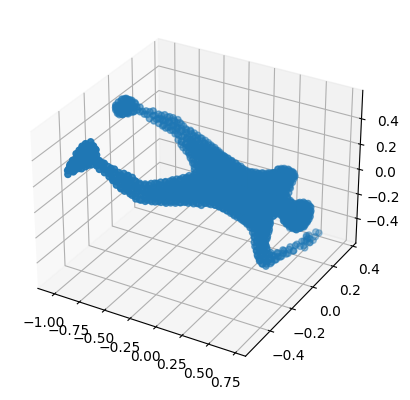

In [5]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

max_distance_matrix = Levi_distance_matrix

# Perform Multidimensional Scaling (MDS)
mds = MDS(n_components=3, metric=True ,dissimilarity='precomputed', n_jobs=-1, eps= 1e-20, verbose=0, random_state=1, n_init = 6, max_iter = 300)
reference_centers = mds.fit_transform(max_distance_matrix)

# Visualize the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers[:, 0], reference_centers[:, 1], reference_centers[:, 2])
plt.show()

[[ 0.12047835  1.2459441   0.17422341]
 [ 0.02199648  0.9338169  -0.11997734]
 [ 0.13532212  0.5594353  -0.1633912 ]
 ...
 [-0.02503218  1.6728408  -0.20013757]
 [ 0.1263822   0.644115   -0.19349913]
 [ 0.04799631  0.87516034 -0.14588639]] 2000


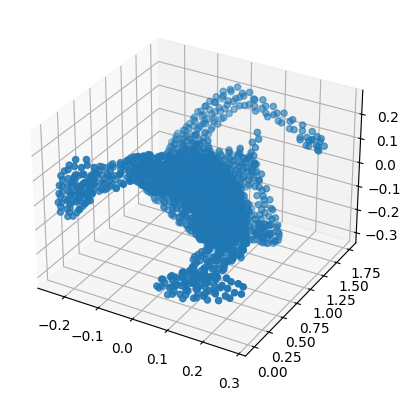

In [7]:
center_datas = []
for i in range(20):
    #load center
    center_filename = f'D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/Frame_00res_{num_points}_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)

print(center_datas[0], center_datas[0].__len__())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(center_datas[0][:, 0], center_datas[0][:, 1], center_datas[0][:, 2])
plt.show()

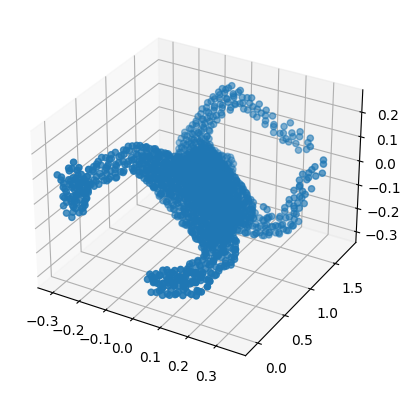

In [8]:
centers = center_datas[0]
reference_centers = reference_centers

centers_mean = np.mean(centers, axis=0)
reference_centers_mean = np.mean(reference_centers, axis=0)
centers_centered = centers - centers_mean
reference_centers_centered = reference_centers - reference_centers_mean

cov_matrix = np.dot(centers_centered.T, reference_centers_centered)

U, _, Vt = np.linalg.svd(cov_matrix)

R = np.dot(U, Vt)

reference_centers_aligned = np.dot(reference_centers_centered, R.T)

reference_centers_aligned = reference_centers_aligned + centers_mean

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers_aligned[:, 0], reference_centers_aligned[:, 1], reference_centers_aligned[:, 2])
plt.show()

In [25]:
center_datas[0]

array([[ 0.12047835,  1.2459441 ,  0.17422341],
       [ 0.02199648,  0.9338169 , -0.11997734],
       [ 0.13532212,  0.5594353 , -0.1633912 ],
       ...,
       [-0.02503218,  1.6728408 , -0.20013757],
       [ 0.1263822 ,  0.644115  , -0.19349913],
       [ 0.04799631,  0.87516034, -0.14588639]])

In [24]:
reference_centers_aligned

array([[ 0.35182608,  1.59960453,  0.027775  ],
       [ 0.03558908,  0.9257926 , -0.10807943],
       [ 0.13925589,  0.54073091, -0.18670698],
       ...,
       [-0.11614585,  1.64055501, -0.25249613],
       [ 0.12458424,  0.62821848, -0.21172407],
       [ 0.05320971,  0.86322701, -0.13833412]])

In [9]:
import open3d as o3d
import numpy as np
spheres = []

# Define the radius of the spheres
sphere_radius = 0.01  # Adjust the radius as needed
changed_sphere = o3d.geometry.TriangleMesh()
# Create a mesh sphere for each point and translate it to the point's location
count = 0
for i in range(center_datas[0].__len__()):
    point = center_datas[0][i]
    # Create a sphere mesh
    mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
    mesh_sphere.compute_vertex_normals()
    
    # Translate the sphere to the point's location
    mesh_sphere.translate(point)
    if not (np.array_equal(point, centers[i])):
        # Color the sphere red if its position is not in reference_centers
        mesh_sphere.paint_uniform_color([1.0, 0.0, 0.0])  # Red color
        changed_sphere += mesh_sphere
        count = count + 1 
    else:
        # Otherwise, color it light grey
        mesh_sphere.paint_uniform_color([0.7, 0.7, 0.7])  # Light grey color
    # Add the sphere to the list
    spheres.append(mesh_sphere)
print(spheres.__len__(), count)
# Combine all the spheres into one mesh
post_spheres = o3d.geometry.TriangleMesh()
for sphere in spheres:
    post_spheres += sphere

# Optionally, you can set the color of the spheres
#all_spheres.paint_uniform_color([0.7, 0.7, 0.7])  # Light grey color

# Draw the combined mesh
o3d.visualization.draw_geometries([post_spheres])

2000 0
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [12]:
import open3d as o3d
import numpy as np
spheres = []

# Define the radius of the spheres
sphere_radius = 0.01  # Adjust the radius as needed
changed_sphere = o3d.geometry.TriangleMesh()
# Create a mesh sphere for each point and translate it to the point's location
count = 0
for i in range(reference_centers_aligned.__len__()):
    point = reference_centers_aligned[i]
    # Create a sphere mesh
    mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
    mesh_sphere.compute_vertex_normals()
    
    # Translate the sphere to the point's location
    mesh_sphere.translate(point)
    if not (np.array_equal(point, centers[i])):
        # Color the sphere red if its position is not in reference_centers
        mesh_sphere.paint_uniform_color([1.0, 0.0, 0.0])  # Red color
        changed_sphere += mesh_sphere
        count = count + 1 
    else:
        # Otherwise, color it light grey
        mesh_sphere.paint_uniform_color([0.7, 0.7, 0.7])  # Light grey color
    # Add the sphere to the list
    spheres.append(mesh_sphere)
print(spheres.__len__(), count)
# Combine all the spheres into one mesh
post_spheres = o3d.geometry.TriangleMesh()
for sphere in spheres:
    post_spheres += sphere

# Optionally, you can set the color of the spheres
#all_spheres.paint_uniform_color([0.7, 0.7, 0.7])  # Light grey color

# Draw the combined mesh
o3d.visualization.draw_geometries([post_spheres])

2000 2000
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Save reference_centers_aligned as a .xyz file
output_filename = 'D:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/reference_centers_aligned.xyz'
np.savetxt(output_filename, reference_centers_aligned, fmt='%f', delimiter=' ')

# Print the first few lines to verify the saved file
with open(output_filename, 'r') as file:
    lines = file.readlines()
    print("".join(lines[:5]))  # Print the first 5 lines to verify




0.342365 1.527445 0.062011
0.034058 0.930280 -0.113880
0.145336 0.547979 -0.186626
-0.129805 0.839085 0.031462
0.100596 1.157990 -0.091800

